In [93]:
# import libraries
# ================

# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression operations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# storing and analysing data
import pandas as pd
# for scraping web contents
from bs4 import BeautifulSoup
# regular expression
import re
# for numerical analysis
import numpy as np



In [94]:
import urllib

In [95]:
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

In [96]:
url = 'https://prsindia.org/covid-19/cases'

response = urllib.request.urlopen(url)
webContent = response.read()

f = open('obo-t17800628-33.html', 'wb')
f.write(webContent)
f.close

<function BufferedWriter.close>

In [97]:
# get data
# ========

# link at which web data recides
link = 'https://prsindia.org/covid-19/cases'
# get web data
req = requests.get(link, headers = headers)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [98]:
soup = BeautifulSoup(str(soup).replace("<!--<tbody>", "<tbody>"), "html.parser")

In [99]:
#soup

In [100]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
#print(thead)

In [101]:
# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
#print(head)

In [102]:
# get the table tbody
# it contains the contents
# print(soup.find_all('tbody'))
tbody = soup.find_all('tbody')[-1]
#print(tbody)

In [103]:
# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
#print(body)

In [104]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
#print(head_rows)



In [105]:
# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
#print(body_rows)

In [108]:
# save contents in a dataframe
# ============================
    

# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6])         

columns = ['Index','States', 'Confirmed cases', 'Active cases', 'Cured/discharged','Deaths']
df_bs.columns = columns
#df3.columns = columns



In [109]:
#  states+UT in India
df_bs.head(30)

,Index,States,Confirmed cases,Active cases,Cured/discharged,Deaths
0,1,Andaman and Nicobar Islands,10157,42,9986,129
1,2,Andhra Pradesh,2321379,755,2305893,14731
2,3,Arunachal Pradesh,64518,4,64218,296
3,4,Assam,724788,395,716405,7988
4,5,Bihar,832581,934,819388,12259
5,6,Chandigarh,93785,568,92052,1165
6,7,Chhattisgarh,1154179,861,1139282,14036
7,8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
8,9,Delhi,1934009,4325,1903423,26261
9,10,Goa,248540,982,243720,3838


In [111]:
# saving the dataframe
df_bs.to_csv(r'C:\Users\aksha\OneDrive\Desktop\StatesData.csv')

In [112]:
# Read in the data

df = pd.read_csv(r'C:\Users\aksha\OneDrive\Desktop\StatesData.csv')

In [113]:
# Let's look at the data

df.head()

,Unnamed: 0,Index,States,Confirmed cases,Active cases,Cured/discharged,Deaths
0,0,1,Andaman and Nicobar Islands,10157,42,9986,129
1,1,2,Andhra Pradesh,2321379,755,2305893,14731
2,2,3,Arunachal Pradesh,64518,4,64218,296
3,3,4,Assam,724788,395,716405,7988
4,4,5,Bihar,832581,934,819388,12259


In [114]:
# Data typer for our columns

df.dtypes

Unnamed: 0           int64
Index                int64
States              object
Confirmed cases      int64
Active cases         int64
Cured/discharged     int64
Deaths               int64
dtype: object

In [115]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

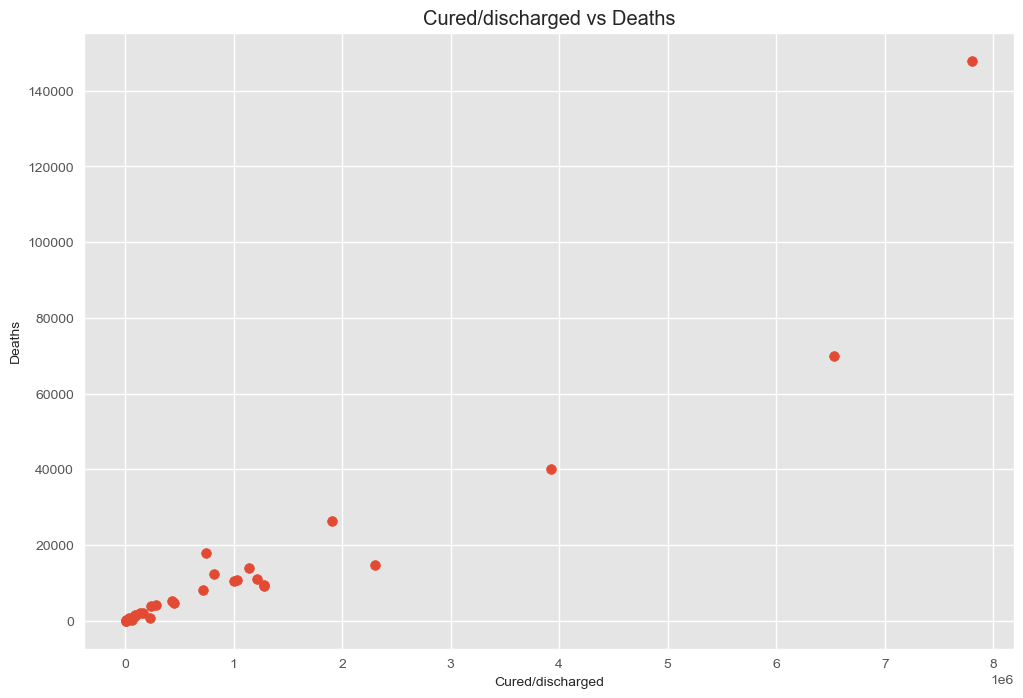

In [134]:
# bar plot with budget vs gross

plt.scatter(x=df['Cured/discharged'], y=df['Deaths'])

plt.title('Cured/discharged vs Deaths')

plt.xlabel('Cured/discharged')

plt.ylabel('Deaths')

plt.show()

In [136]:
import seaborn as sns

<Axes: xlabel='Cured/discharged', ylabel='Deaths'>

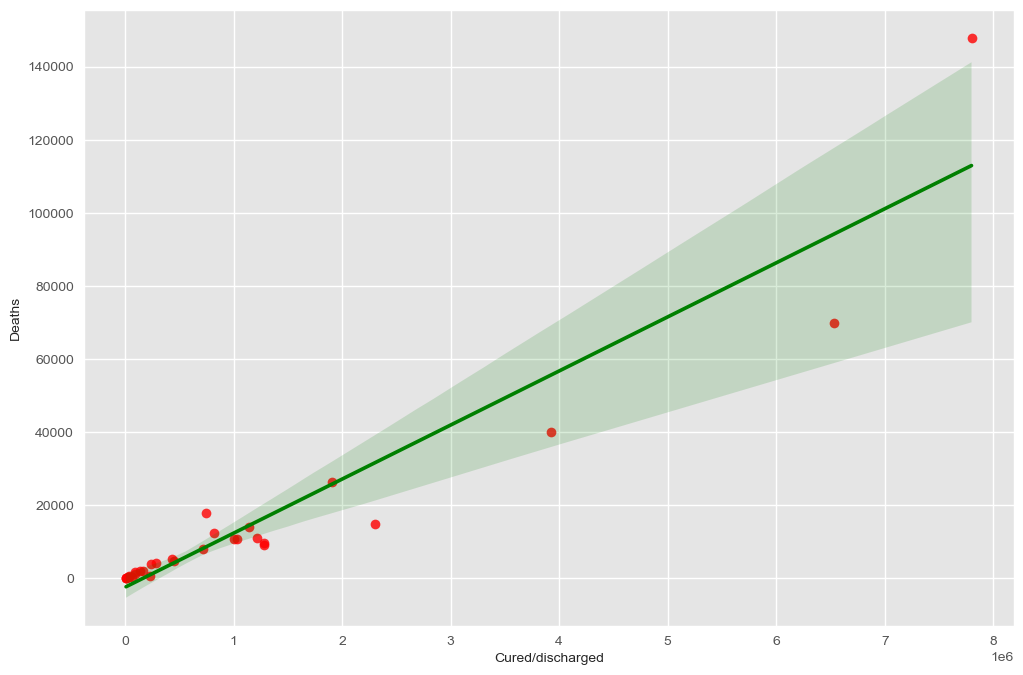

In [137]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'Cured/discharged', y = 'Deaths', data = df, scatter_kws= {"color":"red"}, line_kws = {"color":"green"})